# Исследование объявлений о продаже квартир

**Цель исследования** — установить параметры для определение рыночной стоимости объектов недвижимости.

Результаты исследования позволят построить автоматизированную систему определения рыночной стоимости объектов недвижимости: она отследит аномалии и мошенническую деятельность. 

**Ход исследования**

Входные данные от сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. О каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Перед проведением исследовательского анализа данных понадобится обзор данных для проверки их качества.
Данные будут проверены на ошибки, а также будет дана оценка их влияния на исследование. 
Затем, на этапе предобработки, будет рассмотрена возможность исправить самые критичные ошибки данных. 
Далее будут произведены необходимые расчеты для добавления дополнительных данных в таблицу.
 
Таким образом, исследование пройдёт в четыре этапа:

 1. Изучение данных из файла.
 2. Предобработка данных.
 3. Расчеты и добавление результатов в таблицу.
 4. Исследоватальский анализ данных.

## Изучение данных из файла

Составляю первое представление о данных в объявлениях о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
# импортирую модуль для работы с регулярными выражениями
import re 

In [2]:
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')  # Локальный путь
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
# вывод на экран всех столбцов   
pd.set_option('display.max_columns', 500) 
# два знака после точки для формата float
pd.options.display.float_format ='{:,.2f}'.format 

Вывожу на экран первые десять строк таблицы:

In [3]:
df.head(10) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


Получаю общую информацию о таблице:

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице двадцать один столбец. В столбцах четыре типа данных — `int64`, `float64`, `object`, `bool`.

Согласно документации к данным:

* `total_images` — число фотографий квартиры в объявлении
* `last_price` — цена на момент снятия с публикации
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `first_day_exposition` — дата публикации
* `rooms` — число комнат
* `ceiling_height` — высота потолков (м)
* `floors_total` — всего этажей в доме
* `living_area` — жилая площадь в квадратных метрах (м²)
* `floor` — этаж
* `is_apartment` — апартаменты (булев тип)
* `studio` — квартира-студия (булев тип)
* `open_plan` — свободная планировка (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `balcony` — число балконов
* `locality_name` — название населённого пункта
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

Названия колонок соответствуют стилю написания названий колонок за исключением одной колонки `cityCenters_nearest`. Далее приведу это название к общепринятому стилю и проверю названия всех колонок на предмет отсутствия пробелов.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Выводы**

В каждой строке таблицы — сведения о квартире, выставленной на продажу несколько лет назад. 
О каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, например, площадь квартиры, количество  комнат, высота потолков, наличие балкона и т.д. Вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Для проведения исследования будут использоваться следующие столбцы:

* `last_price` — цена на момент снятия с публикации
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `first_day_exposition` — дата публикации
* `rooms` — число комнат
* `ceiling_height` — высота потолков (м)
* `floors_total` — всего этажей в доме
* `living_area` — жилая площадь в квадратных метрах (м²)
* `floor` — этаж
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

Чтобы двигаться дальше, нужно устранить проблемы в данных указанных столбцов.

## Предобработка данных

Проверяю отсутствие пробелов в заголовках столбцов, корректирую название одного столбца и исключаю пропуски в данных.  
Проверяю данные на дубликаты.

### Стиль заголовков
Вывожу на экран названия столбцов:

In [5]:
# названия столбцов
df.columns 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Пробелов в названии столбцов нет.
Переименую столбец `cityCenters_nearest`.

In [6]:
# переименование столбца
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}) # переименование столбца

Проверю результат переименования.

In [7]:
df.columns # названия столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Пропуски значений

Посчитаю, сколько в таблице пропущенных значений:

In [8]:
# подсчёт пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Более чем в половине столбцов выявлены пропуски. 
Причиной этому могут быть сбои в выгрузке данных, ошибки при вводе данных, а также незаполнение риэлтором/продавцом части параметров квартиры.

#### Высота потолков

Большое число пропусков в столбце `ceiling_height`. 
Поскольку высота потолков не зависит от других имеющихся параметров квартиры (к примеру, при маленькой площади может быть высокий потолок, наличие балкона не влияет на высоту потолка. Можно было бы, при наличии, обнаружить связь между высотой потолка и годом постройки/типом архитекторного проекта), заполню пропущенные значения значением медианы высоты потолков, используя метод median().

In [9]:
# подсчет медианы
ceiling_height_median = df['ceiling_height'].median()      
# заполнение пропущенных значений значением медианы
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median) 

#### Количество этажей в доме

В столбце `floors_total` совсем мало пропущенных зачений, но их следует заполнить для чистоты исследования. Присвоить пропущенным значениям значение этажа, на котором расположена квартира, было бы не совсем верно, поскольку на стоимость в меньшую сторону влияет расположение квартиры на последнем этаже. Маловероятно, что все эти квартиры находятся именно на последнем этаже. Поэтому прибавлю 1 к значению этажа, чтобы получить этажность дома, и сразу изменю тип данных столбца `floors_total` на int64.

In [10]:
# заполнение пропущенных значений и изменение типа данных
df['floors_total'] = df['floors_total'].fillna(df['floor'] + 1).astype('int64') 

#### Жилая площадь

Пропущенные значения в столбце `living_area` заменю медианным значением жилой площади в зависимости от количества комнат в квартире.

In [11]:
# группировка значений и рассчет медианы
medians = df.groupby('rooms')['living_area'].transform('median') 
# заполнение пропущенных значений медианой
df['living_area'] = df['living_area'].fillna(medians) 

#### Площадь кухни

Порядка 10% составляют пропущенные значения в столбце `kitchen_area`.  Апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания. Вероятнее всего, отдельного пространства с кухней в них нет, есть лишь часть комнаты, которая используется в кухонных целях. Поэтому в этом типе жилья пропущенные значения заменю 0.

In [12]:
# заполнение нулем пропущенных значений при условии, что жилое помещение является апартаментами
df['kitchen_area'] = df.loc[df['is_apartment'] == True,'kitchen_area'].fillna(0)

Для заполнения остальных пропущенных значений в столбце `kitchen_area` рассчитаю среднее отношение площади кухни к общей площади квартиры. На полученное среднее отношение умножу общую площадь.

In [13]:
kitchen_area_div = (df['kitchen_area'] / df['total_area']).mean() # рассчет среднего значения

In [14]:
# заполнение пропущенных значений с использованием полученного среднего значения
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_area_div) 

####  Название населенного пункта

Обнаружено 49 пропусков в названии населенных пунктов, что составляет очень малую долю (0.2%) от общих данных. Восстановить или заменить данные пропуски конкретным названием населенного пункта не представляется возможным. Заменю их значением "Нет данных".

In [15]:
df['locality_name'] = df['locality_name'].fillna('Нет данных')

Еще раз проверю пропуски в таблице, чтобы убедиться, что их не осталось в тех столбцах, где устраняла.

In [16]:
display(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Выводы**

Пропущенные значения в необходимых для исследования столбцах, за исключением `city_centers_nearest`, заполнены.  
Пропущенные значения в столбце с данными о расстоянии до центра города оставлю как есть, т.к. в предоставленных данных нет информации, на основе которой можно было бы логическим образом произвести заполнение пропусков.

### Изменение типа данных и метрических единиц

Сначала добавлю новый столбец `city_centers_nearest_km`, который заполню значениями столбца `city_centers_nearest`, переведенные из метров в километры. Далее изменю тип данных столбца `city_centers_nearest_km` с вещественного на целочисленный с использованием метода astype(), предварительно округляя значения.

In [17]:
# присваиваю столбцу значение в км
df['city_centers_nearest_km'] = df['city_centers_nearest']/1000  
#  округление и изменение типа данных на целочисленный
df['city_centers_nearest_km']= df['city_centers_nearest_km'].round().astype('Int64') 

In [18]:
# проверяю добавление столбца
df.head(100)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_centers_nearest_km
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,NaN,False,False,17.41,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,16
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,NaN,False,False,6.51,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,19
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,NaN,False,False,9.03,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,14
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.65,14,45.00,9,NaN,False,False,25.63,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,7
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,NaN,False,False,16.12,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14,"5,150,000.00",47.00,2018-08-06T00:00:00,2,2.75,9,28.10,9,False,False,False,7.58,2.00,Санкт-Петербург,"10,142.00","13,743.00",2.00,751.00,1.00,881.00,34.00,14
96,20,"8,780,000.00",78.30,2018-08-24T00:00:00,3,2.50,15,51.00,9,NaN,False,False,12.62,NaN,Санкт-Петербург,"52,108.00","16,333.00",0.00,NaN,1.00,746.00,31.00,16
97,15,"4,898,000.00",146.00,2019-02-12T00:00:00,4,2.65,2,77.00,2,NaN,False,False,23.53,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,34.00,<NA>
98,11,"11,700,000.00",80.00,2014-12-10T00:00:00,3,2.65,5,55.10,3,NaN,False,False,12.90,0.00,Санкт-Петербург,"11,248.00","8,767.00",1.00,666.00,0.00,NaN,831.00,9


**Выводы**

Добавлен новый столбец со значениями расстояния до центра города в километрах. Значения в нем последовательно округлены, тип данных изменен на целочисленный.  
В столбцах `days_exposition` и `floors_total` тип данных изменен параллельно с заполнением пропущенных значений.

### Дубликаты

#### Явные дубликаты

Считаю явные дубликаты в таблице:

In [19]:
# подсчёт явных дубликатов
df.duplicated().sum() 

0

#### Неявные дубликаты

Посмотрю уникальные значения столбца `locality_name`.

In [20]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Проверю количество уникальных значений столбца.

В написании слова "поселок" иногда встречается "ё", изменю ее на "е".

In [21]:
# замена ё на е
df['locality_name'] = df['locality_name'].str.replace('ё','е') 

Обнаружен внушительный перечень населенных пунктов. Встречаются просто названия и названия с указанием типа населенного пункта. Выделю с помощью регулярного выражения в каждой строке название без указания типа населенного пункта, чтобы проверить данные на наличие неявных дубликатов. Полученное название добавлю в новый столбец `locality_name_short`.

In [22]:
# создаю функцию
def only_upper(row): 
    # вызываю фукцию для замены значений по заданному условию и возвращаю копию строки
    return re.sub(r'\b[а-я]+\s*', "", row['locality_name']).strip() 
# добавляю столбец с названием населенного пункта
df['locality_name_short'] = df.apply(only_upper, axis=1) 

In [23]:
# проверяю добавление столбца
df.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_centers_nearest_km,locality_name_short
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,NaN,False,False,17.41,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,16,Санкт-Петербург
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,NaN,False,False,6.51,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,19,Шушары
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,NaN,False,False,9.03,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,14,Санкт-Петербург
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.65,14,45.00,9,NaN,False,False,25.63,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,7,Санкт-Петербург
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,NaN,False,False,16.12,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,8,Санкт-Петербург


**Выводы**

Явных дубликатов не обнаружено.
Обнаружены неявные дубликаты в столбце с названиями населенных пунктов. Они устранены заменой буквы ё на е и добавлением нового столбца с названием населенного пункта без указания его типа. В дальнейшем исследовании будет использоваться этот столбец.

### Расчеты и добавление результатов в таблицу.

***Цена квадратного метра***

Добавлю столбец с ценой квартиры за квадратный метр `price_for_meter`, разделив стоимость квартиры на общую площадь.

In [24]:
df['price_for_meter'] = df['last_price'] / df['total_area']

***День недели, месяц и год публикации объявления***

Приведу столбец `first_day_exposition` к формату даты и добавляю столбцы дня недели, месяца и года.

In [25]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

***Этаж квартиры***

Сгруппирую квартиры по этажам: первый, последний, другой.

In [26]:
# функция для группировки этажей
def create_category_floor(df): 

    if df['floor'] == 1:
        return 'первый'
    if df['floor']== df['floors_total']:
        return 'последний'
    return 'другой'
# добавление столбца с группировкой этажей      
df['floor_category'] = df.apply(create_category_floor, axis = 1)

***Соотношение площадей***

Добавлю столбец `living_total` с отношением жилой площади к общей.

In [27]:
df['living_total'] = df['living_area'] / df['total_area']

Добавлю столбец `kitchen_total` с отношением площади кухни к общей.

In [28]:
df['kitchen_total'] = df['kitchen_area'] / df['total_area']

Проверю наличие добавленных столбцов.

In [29]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_centers_nearest_km,locality_name_short,price_for_meter,weekday,month,year,floor_category,living_total,kitchen_total
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,NaN,False,False,17.41,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,16,Санкт-Петербург,"120,370.37",3,3,2019,другой,0.47,0.16
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,NaN,False,False,6.51,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,19,Шушары,"82,920.79",1,12,2018,первый,0.46,0.16
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,NaN,False,False,9.03,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,14,Санкт-Петербург,"92,785.71",3,8,2015,другой,0.61,0.16
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,45.00,9,NaN,False,False,25.63,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,7,Санкт-Петербург,"408,176.10",4,7,2015,другой,0.28,0.16
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,NaN,False,False,16.12,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,8,Санкт-Петербург,"100,000.00",1,6,2018,другой,0.32,0.16


**Выводы**

Добавлены столбцы со стоимостью квардратного метра, с отношением жилой площади к общей и  площади кухни к общей.  
Созданы столбцы с датой, месяцем и годом публикации объявления о продаже.  
Создан столбец с тремя категориями этажей: первый, последний и другой.

##  Исследовательский анализ данных

### Площадь, цена, число комнат, высота потолков ###

Посмотрю описательную статистику по столбцам с указанными значениями.

In [30]:
df[['last_price', 'total_area', 'rooms', 'ceiling_height']].describe()

,last_price,total_area,rooms,ceiling_height
count,"23,699.00","23,699.00","23,699.00","23,699.00"
mean,"6,541,548.77",60.35,2.07,2.72
std,"10,887,013.27",35.65,1.08,0.99
min,"12,190.00",12.00,0.00,1.00
25%,"3,400,000.00",40.00,1.00,2.60
50%,"4,650,000.00",52.00,2.00,2.65
75%,"6,800,000.00",69.90,3.00,2.70
max,"763,000,000.00",900.00,19.00,100.00


Стоимость квартир начинается с 12190 руб. и заканчивается 763млн.руб.  
Площадь квартир варьируется от 12 до 900 кв.м.  
Среднее значение стоимости и площади заметно выше медианного. Очевидно, что высокие значения редки и сильно влияют на средний показатель.  
Количество комнат от 0 до 19, высота потолков от 1 до 100. Разница между средним и медианным значениемя не существенна, но вызывает подозрение 0 комнат и высота 100 м.  

Построю гистограммы для исследуемых значений.
Начну со стоимости квартир.

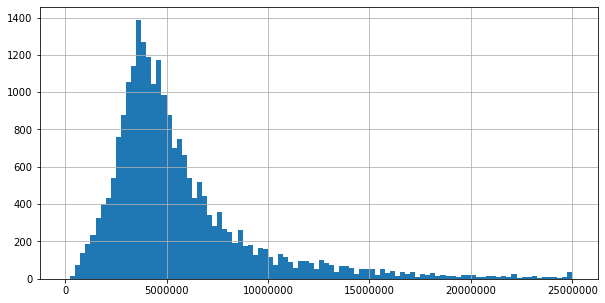

In [31]:
# построение гисторгаммы для 'last_price'
df['last_price'].hist(bins=100, range = (0,25000000), figsize = (10, 5)) 
# формат числа на осях гистограммы для указания наглядных полных чисел
plt.ticklabel_format(style = 'plain') 

Распределение значений цены тяготеет нормальному, однако часть с высокой стоимостью уходит далеко вправо. На это влияют указанные ранее все более дорогие, но все более редкие квартиры. Основная стоимость квартир находится между 1млн и 8 млн.руб.  

Напишу функцию для построения гистограмм для остальных исследуемых значений.

In [32]:
# создаю функцию, указываю аргументы
def df_hist(col, bins, range_):
    # строю гистограмму
    df_hist = df[col].hist(bins=bins, range=range_) 
    # название гистограммы
    plt.title(col) 
    return df_hist

Построю гистограмму для общей площади.

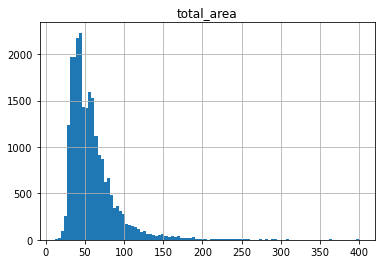

In [33]:
# строю гисторгамму для 'total_area' с помощью функции df_hist
df_hist('total_area', 100, (12,400));

Популярная площадь квартир, выславляемая на продажу, составляет 41-43 кв.м. Основная часть квартир размером от 30 до 90 кв.м.  

Построю гистограмму для количества комнат.

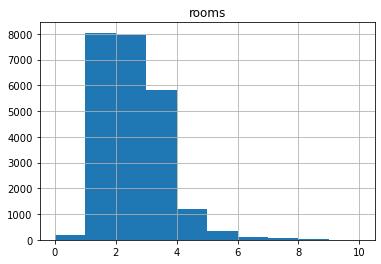

In [34]:
# строю гисторгамму для 'rooms' с помощью функции df_hist
df_hist('rooms', 10, (0,10)); 

В основном, продаются квартиры с 1-4 комнатами.

Построю гистограмму для высоты потолков.

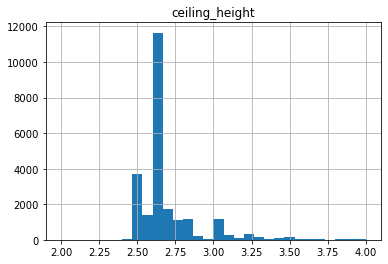

In [35]:
# строю гисторгамму для 'ceiling_height' с помощью функции df_hist
df_hist('ceiling_height', 30, (2,4));

Стандартная высота потолка, согласно гистограмме, составляет 2.65 см, много квартир с потолками высотой 2.5 см. В основном, высота варьируется от 2.45 до 3.1, но встречаются квартиры и со значительно более высокими потолками.  

**Выводы** 

С помощью описательной статистики и гистограмм изучены значения цены, площади, числа комнат и высоты потолков.  
Отчетливо прослеживаются параметры массового жилья, однако присутствует значительное количество квартир с выделяющимися в большую сторону значениями. Также наблюдаются подозрительно минимальные значения, к примеру, 0 комнат или высота потолков 1 м.  

В дальнейшем изучу эти значения на предмет редких и выбивающихся.

### Исследование количества времени для продажи квартиры ###  

Посмотрю описательную статистику для количества дней размещения объявления.

In [36]:
df['days_exposition'].describe()

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

Объявления о продаже квартир размещались от 1 до 1580 дней. Соответственно, квартира могла быть продана и очень быстро, и очень медленно (более 4х лет). В среднем объявление о продаже было доступно 169 дней. Медианное значение составляет 95 дней, что значительно ниже среднего.

Построю гистограмму для количества дней размещения объявления.

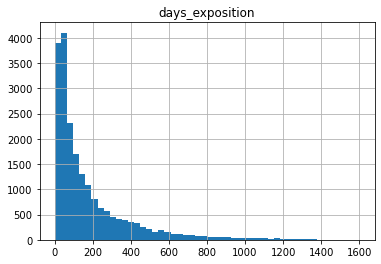

In [37]:
# строю гистограмму
df['days_exposition'].hist(bins=50, range = (1,1600)) 
# указываю название
plt.title('days_exposition');

На гистограмме заметен пик на 95 днях, большая часть квартир продается в период до 200 дней. Однако наблюдаются квартиры, которые за год не снимают с продажи и еще долго (3-4 года) находяться в объявлениях о продаже.

**Вывод**

С помощью описательной статистики и гистограммы изучено значение количества дней размещения объявления.  
Отчетливо прослеживается стандартное время размещения объявления, однако присутствует немалое количество крайне высоких значений количества дней.

В следующем разделе изучу это значение на предмет редких и выбивающихся.

### Редкие и выбивающиеся значения ###

Для выявления редких и выбивающихся значений в значениях площади, цены, числа комнат, высоты потолков и времени продажи квартиры построю графики "ящик с усами" для каждого значения.  
Для этого напишу функцию.

In [38]:
# создаю функцию, указываю аргументы
def df_plot_box(col, kind, ylim, grid): 
    # создаю график "ящик с усами"
    df_plot_box = df[col].plot(kind=kind, ylim=ylim, grid=grid) 
    return df_plot_box

***Cтоимости квартир***

Построю график "ящик с усами" для стоимости квартир.

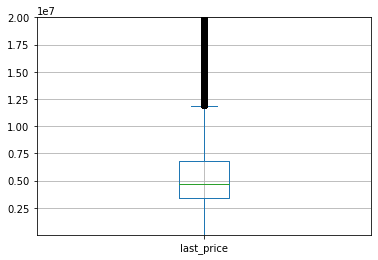

In [39]:
# "ящик с усами" для 'last_price' с помощью функции df_plot_box
df_plot_box('last_price', 'box', (12000, 20000000), True); 

Выбросом являются значения от чуть менее 12млн. рублей (порядка 11.9 млн.) и выше.   

***Площадь квартир***

Построю график "ящик с усами" для площади квартир.

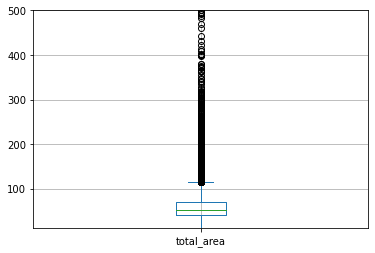

In [40]:
# "ящик с усами" для 'total_area' с помощью функции df_plot_box
df_plot_box('total_area', 'box', (12, 500), True);

Нижний «ус» упирается в 12 кв.м, минимальное значение. Верхний заканчивается около 115 кв.м — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Следовательно, площадь квартиры более 115 кв.м является выбросом.  

***Количество комнат***

Построю график "ящик с усами" для количества комнат.

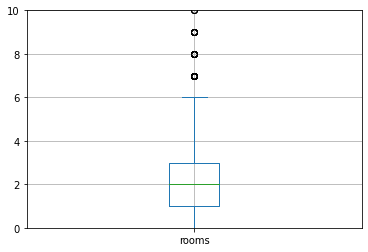

In [41]:
# "ящик с усами" для 'rooms' с помощью функции df_plot_box
df_plot_box('rooms', 'box', (0, 10), True); 

Выбросом являются значения свыше 6 комнат.
Интересно, что значение 0 комнат не является вбросом. Предположу, что это помещения свободной планировки типа студии без отдельной спальни.
Проверю эту гипотезу.
Посмотрю строки таблицы со значение комнат 0.

In [42]:
# выборка строк с условием
df.query('rooms == 0') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_centers_nearest_km,locality_name_short,price_for_meter,weekday,month,year,floor_category,living_total,kitchen_total
144,1,"2,450,000.00",27.00,2017-03-30,0,2.65,24,15.50,2,NaN,True,False,4.35,2.00,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00,<NA>,Мурино,"90,740.74",3,3,2017,другой,0.57,0.16
349,4,"2,320,000.00",25.00,2017-09-27,0,2.65,14,17.00,1,NaN,False,True,4.03,0.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00,<NA>,Кудрово,"92,800.00",2,9,2017,первый,0.68,0.16
440,8,"2,480,000.00",27.11,2018-03-12,0,2.65,17,24.75,4,NaN,True,False,4.37,2.00,Санкт-Петербург,"38,171.00","15,015.00",0.00,NaN,2.00,982.00,64.00,15,Санкт-Петербург,"91,479.16",0,3,2018,другой,0.91,0.16
508,0,"3,375,000.00",34.40,2017-03-28,0,2.65,26,24.30,19,NaN,False,True,5.55,1.00,поселок Парголово,"53,115.00","19,292.00",0.00,NaN,1.00,593.00,430.00,19,Парголово,"98,110.47",1,3,2017,другой,0.71,0.16
608,2,"1,850,000.00",25.00,2019-02-20,0,2.65,10,18.00,7,NaN,True,False,4.03,NaN,поселок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.00,<NA>,Шушары,"74,000.00",2,2,2019,другой,0.72,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,"3,200,000.00",26.00,2017-09-01,0,2.65,25,18.00,16,NaN,True,False,4.19,0.00,Санкт-Петербург,"11,405.00","13,222.00",0.00,NaN,1.00,623.00,14.00,13,Санкт-Петербург,"123,076.92",4,9,2017,другой,0.69,0.16
23442,0,"2,500,000.00",27.70,2017-09-28,0,2.65,24,18.00,4,NaN,False,True,4.47,2.00,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.00,<NA>,Мурино,"90,252.71",3,9,2017,другой,0.65,0.16
23554,15,"3,350,000.00",26.00,2018-09-07,0,2.65,19,18.00,8,NaN,True,False,4.19,NaN,Санкт-Петербург,"18,090.00","17,092.00",0.00,NaN,2.00,112.00,31.00,17,Санкт-Петербург,"128,846.15",4,9,2018,другой,0.69,0.16
23592,10,"1,450,000.00",29.00,2017-11-11,0,2.65,9,18.00,8,NaN,False,True,4.67,2.00,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.00,<NA>,Никольское,"50,000.00",5,11,2017,другой,0.62,0.16


Всего 22 квартиры с 0 комнатами. Общая площадь небольшая. В столбце `studio` указано либо True, либо False. Однако рядом столбец `open_plan`, в котором прямо противоположные значения. Получается, для указания признака студии/планировки открытого типа в базу заносилась отметка в один из указанных столбцов. Значит, действительно 0 комнат означает помещение студию.

***Высота потолков***

Построю график "ящик с усами" для высоты потолков.

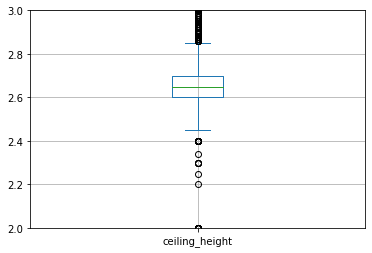

In [43]:
# "ящик с усами" для 'ceiling_height' с помощью функции df_plot_box
df_plot_box('ceiling_height', 'box', (2, 3), True); 

Выбросом являются значения до 2.45м от 2.85м. 

***Время продажи квартиры***

Построю график "ящик с усами" для времени продажи квартиры.

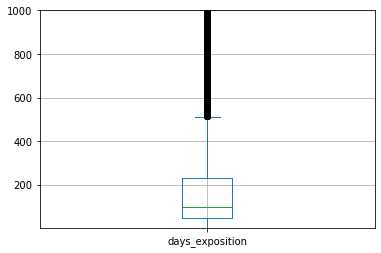

In [44]:
# "ящик с усами" для 'days_exposition' с помощью функции df_plot_box
df_plot_box('days_exposition', 'box', (1,1000), True); 

Выбросом являются значения с более 430 дней размещения объявления.

Создам новый датафрейм df_good_data, в который включу данные по квартирам с исключением редких и выбивающихся значений.   
Верхнюю границу высоты потолков установлю в размере 4 м, поскольку в Санкт_Петербурге и некоторых пригородах (например, г.Пушкин) находятся исторические "сталинки" с высокими потолками.  
Значения дней размещения объявлений совсем не буду отрезать, т.к. действительно встречаются квартиры, которые могут продаваться годами по разным причинам.

In [45]:
df_good_data = df[
    (df['last_price'] <= 11900000) &   # цена ниже или равна 11.9 млн.руб.
    (df['total_area'] <=115) & # площадь ниже или равна 115 кв.м
    (df['rooms'] <= 6) & # количество комнат 6 и ниже
    (df['ceiling_height'] >=2.45) &  # высота потолков от 2.45м до 2.85м
    (df['ceiling_height'] <=4)
]

Проверю создание датафрейма с указанными параметрами.

In [46]:
df_good_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_centers_nearest_km,locality_name_short,price_for_meter,weekday,month,year,floor_category,living_total,kitchen_total
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,NaN,False,False,6.51,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,19,Шушары,"82,920.79",1,12,2018,первый,0.46,0.16
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,NaN,False,False,9.03,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,14,Санкт-Петербург,"92,785.71",3,8,2015,другой,0.61,0.16
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,NaN,False,False,16.12,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,8,Санкт-Петербург,"100,000.00",1,6,2018,другой,0.32,0.16
5,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12,14.40,5,NaN,False,False,4.90,NaN,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,<NA>,Янино-1,"95,065.79",0,9,2018,другой,0.47,0.16
6,6,"3,700,000.00",37.30,2017-11-02,1,2.65,26,10.60,6,NaN,False,False,6.01,1.00,поселок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00,19,Парголово,"99,195.71",3,11,2017,другой,0.28,0.16
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24,30.50,22,NaN,False,False,11.54,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN,12,Санкт-Петербург,"110,544.69",3,4,2019,другой,0.43,0.16
8,20,"2,900,000.00",33.16,2018-05-23,1,2.65,27,15.43,26,NaN,False,False,5.35,NaN,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,<NA>,Мурино,"87,454.76",2,5,2018,другой,0.47,0.16
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,NaN,False,False,9.83,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00,15,Санкт-Петербург,"88,524.59",6,2,2017,другой,0.71,0.16
10,5,"5,050,000.00",39.60,2017-11-16,1,2.67,12,20.30,3,NaN,False,False,6.38,NaN,Санкт-Петербург,"38,357.00","13,878.00",1.00,310.00,2.00,553.00,137.00,14,Санкт-Петербург,"127,525.25",3,11,2017,другой,0.51,0.16
11,9,"3,300,000.00",44.00,2018-08-27,2,2.65,5,31.00,4,False,False,False,7.09,1.00,Ломоносов,"48,252.00","51,677.00",0.00,NaN,0.00,NaN,7.00,52,Ломоносов,"75,000.00",0,8,2018,другой,0.70,0.16


**Вывод**

С помощью графика "ящик с усами" определены редкие и выбивающиеся значения в столбцах цены, площади, числа комнат, высоты потолков и времени продажи квартиры. Получившиеся значения подтверждают выводы, сделанные на основе описательной статистики и гистограмм для указанных значений в двух предыдущих разделах исследования.

Создан датафрейм с данными, частично очищенными от редких и выбивающихся значений. 
Дальнейшее исследование будет проводиться на его основе, за исключением изучения части значений в центральной зоне Санкт-Петербурга.

### Факторы, влияющие на стоимость квартиры ###

Определю факторы, в большей степени влияющие на стоимость квартиры. 
Изучу, зависит ли цена от площади, числа комнат, удалённости от центра, этажа, а также от даты размещения: дня недели, месяца и года.

#### Площадь, число комнат, удалённость от центра

Построю матрицу корреляций для стоимости квартиры, площади, числа комнат и удаленности от центра. 

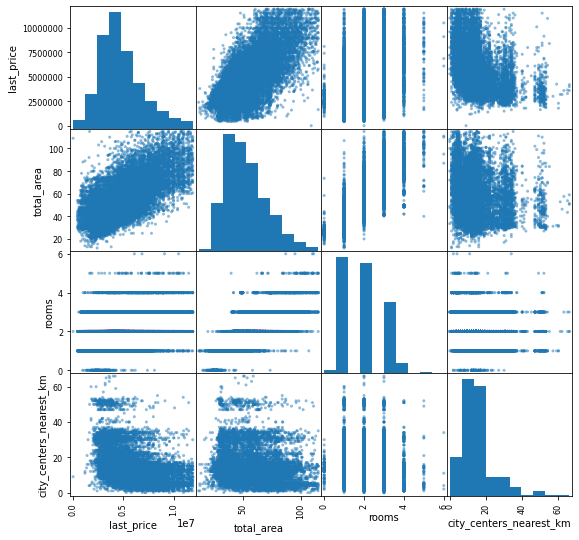

In [47]:
# группировка столбцов в новую переменную
df_for_corr = df_good_data[['last_price', 'total_area', 'rooms', 'city_centers_nearest_km']] 
pd.plotting.scatter_matrix(df_for_corr, figsize=(9,9)); # создание матрицы рассеяния

In [48]:
df_good_data.loc[:,['last_price', 'total_area', 'rooms', 'city_centers_nearest_km']].corr()

,last_price,total_area,rooms,city_centers_nearest_km
last_price,1.00,0.70,0.44,-0.35
total_area,0.70,1.00,0.80,-0.12
rooms,0.44,0.80,1.00,-0.07
city_centers_nearest_km,-0.35,-0.12,-0.07,1.00


* наблюдается высокая зависимость стоимости квартиры от ее площади
* наблюдается слабая зависимость стоимости квартиры от количества комнат
* наблюдается обратная слабая зависимость стоимости квартиры от ее удаленности от центра

#### Этаж

Сгруппирую данные по категориям этажей и выведу среднее значение стоимости квартиры для каждой категории, сохраню результат в переменную floor_price.

In [49]:
# группировка и подсчет среднего значения
floor_price = df_good_data.groupby('floor_category')['last_price'].mean() 
floor_price

floor_category
другой      5,014,327.10
первый      4,087,431.80
последний   4,432,150.68
Name: last_price, dtype: float64

Построю линейный график с полученными значениями.

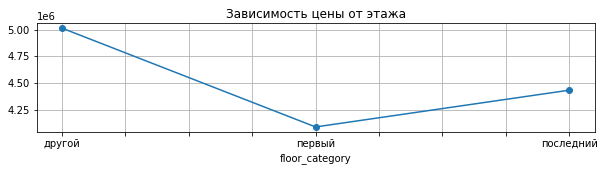

In [50]:
floor_price.plot(x='floor_category',  
                 grid=True, style='o-', 
                 title='Зависимость цены от этажа', 
                 figsize=(10,2)); 

На графике отчетливо видно, что стоимость квартиры зависит от этажа: ниже по стоимости квартиры на первом этаже, на последнем этаже дороже, на остальных этажах еще дороже.

#### Дата размещения объявления

Вынесу в отдельную переменную first_exposition значения цены, дня недели, месяца и года.
Подсчитаю коэффициент корреляции по этим значениям.

In [51]:
# группировка столбцов в новую переменную
first_exposition = df_good_data[['last_price', 'year','month','weekday']] 
# подсчет коэффициента корреляции
first_exposition.corr()  

,last_price,year,month,weekday
last_price,1.00,0.00,0.01,-0.01
year,0.00,1.00,-0.27,-0.00
month,0.01,-0.27,1.00,0.01
weekday,-0.01,-0.00,0.01,1.00


Согласно полученным значениям коэффициента корреляции практически отсутствует зависимость от дня недели и месяца размещения объявления о продаже квартиры. Зависимость от года чуть более заметна, но при этом все-равно очень слабая.

Построю линейные графики, чтобы наглядно посмотреть на степень зависимость цены от исследуемых значений.

Начну со значений года. Сгруппирую данные по году и посчитаю среднюю стоимость квартиры.

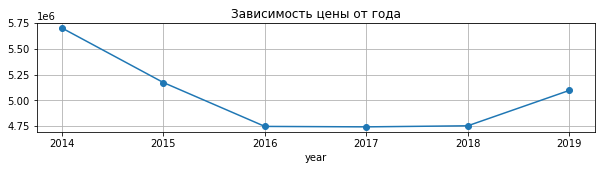

In [52]:
# группировка и подсчет среднего значения
year_exposition = df_good_data.groupby('year')['last_price'].mean() 
# построение линейного графика
year_exposition.plot(x='year',
                     grid=True, 
                     style='o-', 
                     title='Зависимость цены от года', 
                     figsize=(10,2)); 

На графике видно, что средняя цена квартиры с 2016 по 2018 год практически не менялась. C 2018 года наблюдается тенденция к увеличению цены. Обращает на себя внимание высокая средняя цена в 2014 и в 2015 годах. Надо разобраться в причине этого.  
Посчитаю уникальные значения столбца `year`.

In [53]:
# подсчет уникальных значений
df_good_data['year'].value_counts()

2018    7834
2017    7416
2019    2596
2016    2477
2015     995
2014      86
Name: year, dtype: int64

Оказалось, что за 2014 год крайне мало данных: всего 86 квартир, за 2015 год -  всего 40% данных по сравнению с количеством данных в 2016 году. Этого недостаточно, чтобы сделать вывод о высокой зависимости стоимости квартиры от года.

Сгруппирую данные по месяцу и посчитаю среднюю стоимость квартиры.

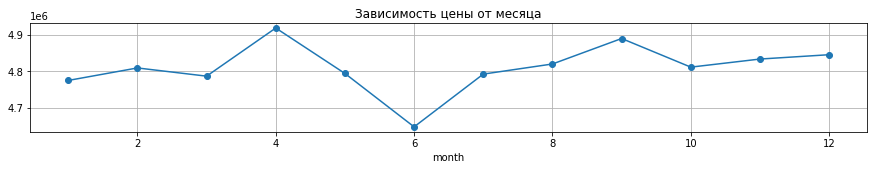

In [54]:
# группировка и подсчет среднего значения
week_exposition = df_good_data.groupby('month')['last_price'].mean() 
# построение линейного графика
week_exposition.plot(x='month',
                     grid=True,
                     style='o-',
                     title='Зависимость цены от месяца', 
                     figsize=(15,2));

Наблюдается очень слабая зависимость цены (разница в 100 - 200 тыс.руб.) от месяца размещения объявления. 

Сгруппирую данные по дню и посчитаю среднюю стоимость квартиры.

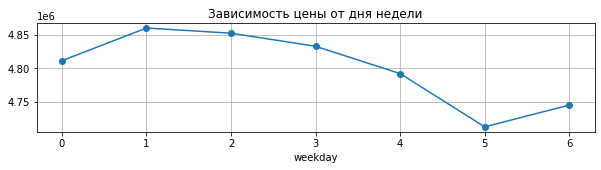

In [55]:
# группировка и подсчет среднего значения
weekday_exposition = df_good_data.groupby('weekday')['last_price'].mean() 
# построение линейного графика
weekday_exposition.plot(
    x='weekday',             
    grid=True, 
    style='o-', 
    title='Зависимость цены от дня недели', 
    figsize=(10,2)
);

Наблюдается еще более слабая зависимость цены (разница в 50-100 тыс.руб.) от дня недели размещения объявления.

**Вывод**

С помощью диаграмм рассеяния, коэффициентов корреляци и графиков изучено влияние площади, числа комнат, удалённости от центра, этажа, а также даты размещения: дня недели, месяца и года на стоимость квартиры. Обнаружены следующие зависимости:

*высокая зависимость стоимости* от площади;

*средняя зависимость стоимости* от площади и этажа;

*слабая зависимость стоимости*  от количества комнат и года размещения объявления;

*обратная слабая зависимость стоимости* от удаленности квартиры от центра;

*очень слабая зависимость стоимости* от месяца размещения объявления;

*отсутствие зависимости стоимости* от дня недели размещения объявления.


### Десять населённых пунктов с наибольшим числом объявлений ###

Найду 10 населённых пунктов с наибольшим числом объявлений.  
Посчитаю среднюю цену квадратного метра в этих населённых пунктах. 
Выделю населённые пункты с самой высокой и низкой стоимостью жилья.




Вынесу в отдельную переменную первые 10 уникальных названий населенных пунктов в столбце `locality_name_short`. Это будут 10 населённых пунктов с наибольшим числом объявлений (ТОП10). 

In [56]:
# подсчет уникальных значений и вывод первых 10ти.
top10_locality_name_short = df['locality_name_short'].value_counts().head(10) 
top10_locality_name_short

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name_short, dtype: int64

Вынесу в отдельную переменную среднюю цену квадратного метра в этих населённых пунктах.

In [57]:
# cрез данных по городам из ТОП10, группировка по городам из ТОП10 и подсчет средней цены
top10_price_for_meter = df.query(
    'locality_name_short in @top10_locality_name_short.index' 
).groupby('locality_name_short')['price_for_meter'].mean() 
top10_price_for_meter

locality_name_short
Всеволожск         68,654.47
Выборг             58,141.91
Гатчина            68,746.15
Колпино            75,424.58
Кудрово            95,324.93
Мурино             86,087.51
Парголово          90,175.91
Пушкин            103,125.82
Санкт-Петербург   114,849.01
Шушары             78,677.36
Name: price_for_meter, dtype: float64

Отсортирую полученные данные по убыванию средней стоимости квадратного метра и построю горизонтальную гистограмму.

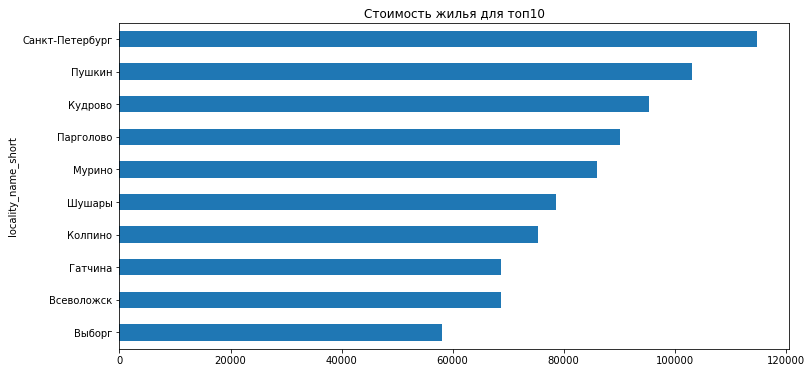

In [58]:
# сортирую значения по убыванию
top10_price_for_meter = top10_price_for_meter.sort_values(ascending=True) 
# построение гистограмму
top10_price_for_meter.plot(kind='barh', x ='price_for_meter', title='Стоимость жилья для топ10', figsize=(12,6)); 

Из списка ТОП10 самая высокая средняя стоимость квадратного метра в Санкт-Петербурге (114,849.01 руб.), самая низкая - в Выборге (58,141.91 руб.).

**Вывод**

Выделены 10 населённых пунктов с наибольшим числом объявлений.  
Посчитана средняя цена квадратного метра в этих населённых пунктах.  
Определены населённые пункты с самой высокой и самой низкой стоимостью жилья, это Санкт-Петербург и Выборг соответственно.

### Изменение цены по степени удалённости от центра в Санкт-Петербурге ###

Выделю квартиры в Санкт-Петербурге.  
Посчитаю среднюю цену для каждого километра.  
Выясню, какая область входит в центральная зону Санкт-Петербурга.

Сохраню в отдельную переменную выборку по Санкт-Петербургу.

In [59]:
# срез по Санкт-Петербургу
piter = df_good_data.query('locality_name_short == "Санкт-Петербург"') 
piter

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_centers_nearest_km,locality_name_short,price_for_meter,weekday,month,year,floor_category,living_total,kitchen_total
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,NaN,False,False,9.03,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,14,Санкт-Петербург,"92,785.71",3,8,2015,другой,0.61,0.16
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,NaN,False,False,16.12,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,8,Санкт-Петербург,"100,000.00",1,6,2018,другой,0.32,0.16
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24,30.50,22,NaN,False,False,11.54,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN,12,Санкт-Петербург,"110,544.69",3,4,2019,другой,0.43,0.16
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,NaN,False,False,9.83,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00,15,Санкт-Петербург,"88,524.59",6,2,2017,другой,0.71,0.16
10,5,"5,050,000.00",39.60,2017-11-16,1,2.67,12,20.30,3,NaN,False,False,6.38,NaN,Санкт-Петербург,"38,357.00","13,878.00",1.00,310.00,2.00,553.00,137.00,14,Санкт-Петербург,"127,525.25",3,11,2017,другой,0.51,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,"9,200,000.00",101.00,2019-04-01,3,3.05,15,63.00,12,NaN,False,False,16.28,NaN,Санкт-Петербург,"15,632.00","14,428.00",0.00,NaN,0.00,NaN,23.00,14,Санкт-Петербург,"91,089.11",0,4,2019,другой,0.62,0.16
23689,13,"3,550,000.00",35.30,2018-02-28,1,2.86,15,16.30,4,NaN,False,False,5.69,2.00,Санкт-Петербург,"17,284.00","16,081.00",1.00,353.00,2.00,652.00,29.00,16,Санкт-Петербург,"100,566.57",2,2,2018,другой,0.46,0.16
23690,3,"5,500,000.00",52.00,2018-07-19,2,2.65,5,31.00,2,NaN,False,False,8.38,NaN,Санкт-Петербург,"20,151.00","6,263.00",1.00,300.00,0.00,NaN,15.00,6,Санкт-Петербург,"105,769.23",3,7,2018,другой,0.60,0.16
23691,11,"9,470,000.00",72.90,2016-10-13,2,2.75,25,40.30,7,NaN,False,False,11.75,1.00,Санкт-Петербург,"19,424.00","4,489.00",0.00,NaN,1.00,806.00,519.00,4,Санкт-Петербург,"129,903.98",3,10,2016,другой,0.55,0.16


Создам сводную таблицу для расчета стоимости квадратного метра квартиры для каждого километра от центра.

In [60]:
# создание сводной таблицы
piter_pivot_table = piter.pivot_table(
    index='city_centers_nearest_km', 
    values='last_price', 
    aggfunc='mean'
).reset_index() 

piter_pivot_table

,city_centers_nearest_km,last_price
0,0,"7,622,500.00"
1,1,"8,115,552.07"
2,2,"7,856,473.37"
3,3,"7,208,024.25"
4,4,"7,471,122.69"
5,5,"7,593,821.90"
6,6,"7,067,390.79"
7,7,"6,654,030.80"
8,8,"6,603,658.63"
9,9,"5,569,574.87"


Нарисую график распределения средней стоимости в зависимости от удаленности от центра.

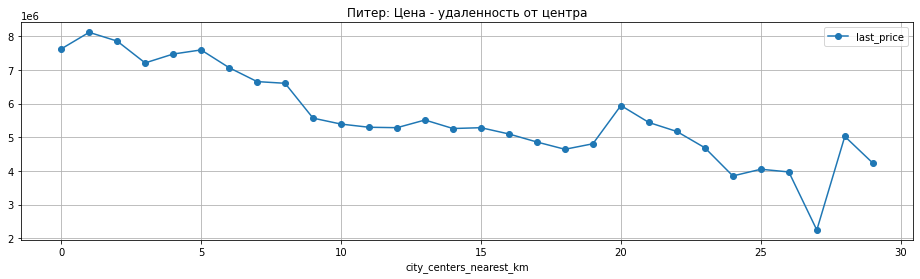

In [61]:
# создание графика распределения средней стоимости в зависимости от удаленности от центра
piter_pivot_table.plot(
    x='city_centers_nearest_km', 
    figsize=(16,4), 
    grid=True,  
    style='o-', 
    title='Питер: Цена - удаленность от центра' 
); 

По графику видно, что после 8км стоимость квартир начинает резко падать. Предполагаю, что центральной зоной  является территория города в радиусе восьми километоров от центра. 

**Вывод**

Выделены квартиры в Санкт-Петербурге.  
Посчитана средняя цена для каждого километра от центра  
Определена центральная зона Санкт-Петербурга - территория города в радиусе восьми километоров от центра.

### Сравнение выводов по квартирам в центре и общих выводов по всему городу ###

Выделю сегмент квартир в центре.  
Проанализирую эту территорию и изучу следующие параметры: цена, площадь, количество комнат, высота потолков и количество времени для продажи квартиры.
Выделю факторы, которые влияют на стоимость квартиры.  
Сравню выводы с общими выводами по всему городу.

#### Сегмент квартир в центре

Сохраню в отдельную переменную выборку по центральной зоне Санкт-Петербурга. Использую данные после устранения аномальных значений.

In [62]:
# срез по центральной зоне Санкт-Петербурга
piter_center = df_good_data[df_good_data['city_centers_nearest_km'] <=2] 
piter_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_centers_nearest_km,locality_name_short,price_for_meter,weekday,month,year,floor_category,living_total,kitchen_total
24,8,"6,500,000.00",97.20,2015-10-31,2,2.65,3,46.50,1,NaN,False,False,15.67,0.00,Санкт-Петербург,"20,052.00","2,336.00",3.00,411.00,3.00,124.00,265.00,2,Санкт-Петербург,"66,872.43",5,10,2015,первый,0.48,0.16
207,11,"9,000,000.00",72.60,2018-09-08,2,2.90,5,43.20,4,NaN,False,False,11.70,NaN,Санкт-Петербург,"22,794.00","1,645.00",2.00,276.00,3.00,485.00,NaN,2,Санкт-Петербург,"123,966.94",5,9,2018,другой,0.60,0.16
213,11,"8,700,000.00",111.40,2016-10-10,4,3.10,4,73.20,2,NaN,False,False,17.96,NaN,Санкт-Петербург,"20,936.00","1,218.00",1.00,463.00,3.00,55.00,791.00,1,Санкт-Петербург,"78,096.95",0,10,2016,другой,0.66,0.16
226,17,"7,950,000.00",86.40,2019-04-24,4,2.65,3,52.70,1,NaN,False,False,13.93,NaN,Санкт-Петербург,"31,729.00","2,468.00",0.00,NaN,0.00,NaN,NaN,2,Санкт-Петербург,"92,013.89",2,4,2019,первый,0.61,0.16
330,16,"7,100,000.00",50.00,2016-04-20,3,2.65,5,31.50,1,NaN,False,False,8.06,NaN,Санкт-Петербург,"21,341.00","2,043.00",2.00,377.00,1.00,411.00,900.00,2,Санкт-Петербург,"142,000.00",2,4,2016,первый,0.63,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22968,7,"6,700,000.00",54.00,2017-11-08,3,2.65,3,36.00,2,NaN,False,False,8.70,NaN,Санкт-Петербург,"22,878.00","2,419.00",0.00,NaN,0.00,NaN,210.00,2,Санкт-Петербург,"124,074.07",2,11,2017,другой,0.67,0.16
23042,12,"11,500,000.00",85.00,2018-08-16,2,3.20,4,48.20,4,NaN,False,False,13.70,NaN,Санкт-Петербург,"21,711.00","1,826.00",2.00,628.00,1.00,78.00,NaN,2,Санкт-Петербург,"135,294.12",3,8,2018,последний,0.57,0.16
23085,4,"5,900,000.00",81.50,2017-07-31,3,3.50,6,43.70,1,NaN,False,False,13.14,NaN,Санкт-Петербург,"21,230.00","1,953.00",2.00,616.00,1.00,55.00,206.00,2,Санкт-Петербург,"72,392.64",0,7,2017,первый,0.54,0.16
23602,0,"8,700,000.00",73.00,2019-01-23,3,2.65,4,45.00,4,NaN,False,False,11.77,NaN,Санкт-Петербург,"20,415.00","2,345.00",2.00,57.00,3.00,151.00,34.00,2,Санкт-Петербург,"119,178.08",2,1,2019,последний,0.62,0.16


***Цена, площадь, количество комнат, высота потолков***

С помощью описательной статистики и гистограмм изучу цену, площадь, число комнат и высоту потолков.

Выведу описательную статистику указанных значений.

In [63]:
# вывод описательной статистики
piter_center[['last_price', 'total_area', 'rooms', 'ceiling_height']].describe() 

,last_price,total_area,rooms,ceiling_height
count,273.00,273.00,273.00,273.00
mean,"7,940,721.61",70.43,2.57,2.96
std,"2,012,617.84",21.14,0.94,0.35
min,"2,100,000.00",12.00,0.00,2.50
25%,"6,550,000.00",55.50,2.00,2.65
50%,"8,200,000.00",70.00,2.00,2.85
75%,"9,350,000.00",85.00,3.00,3.20
max,"11,900,000.00",114.80,6.00,4.00


Стоимость квартир начинается с 2.1  млн. руб. и заканчивается 11.9 млн.руб.
Площадь квартир варьируется от 12 до 114.8 кв.м.
Количество комнат от 0 до 6, высота потолков от 2.5 до 4.3. 
Построю гистограмму для стоимости.

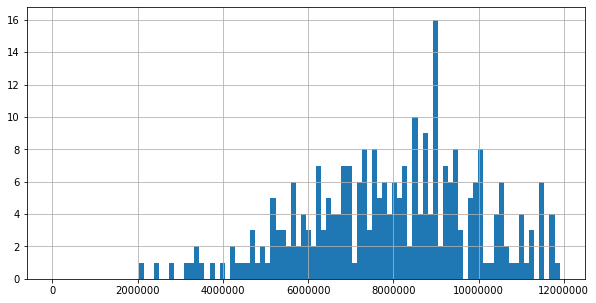

In [64]:
 # построение гистограммы
piter_center['last_price'].hist(bins=100, range = (0,11_900_000), figsize = (10, 5))
plt.ticklabel_format(style = 'plain')

Распределение значений цены тяготеет нормальному.

Напишу функцию для построения гистограмм по остальным значениям.

In [65]:
# создание функции для построения гистограммы
def hist_piter_center(col, bins, range_): 
    df_hist = piter_center[col].hist(bins=bins, range=range_) 
    plt.title(col)
    return hist_piter_center

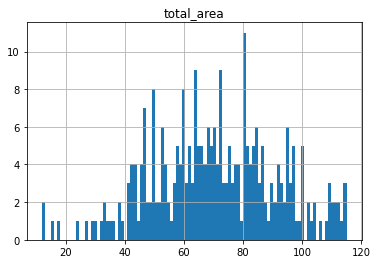

In [66]:
# построение гистограммы с помощью функции df_hist_piter_center
hist_piter_center('total_area', 100, (12,115)); 

Популярная площадь квартир, выславляемых на продажу, составляет 40-100 кв.м. 

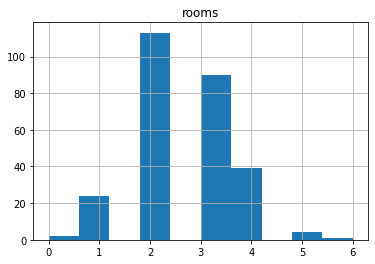

In [67]:
# построение гистограммы с помощью функции df_hist_piter_center
hist_piter_center('rooms', 10, (0,6)); 

В основном, продаются квартиры с 2-4 комнатами.

Построю гистограмму для высоты потолков.

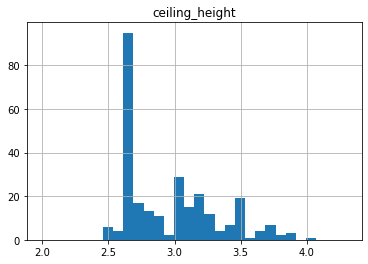

In [68]:
# построение гистограммы с помощью функции df_hist_piter_center
hist_piter_center('ceiling_height', 30, (2,4.3)); 

Стандартная высота потолка, согласно гистограмме, составляет 2.65 см, много квартир с потолками выше 3 м. В основном, высота варьируется от 2.65 до 3.6м.

***Исследование количества времени для продажи квартиры***

Посмотрю описательную статистику для количества дней размещения объявления.

In [69]:
piter_center['days_exposition'].describe()

count     248.00
mean      243.09
std       270.16
min         3.00
25%        60.00
50%       131.50
75%       336.00
max     1,477.00
Name: days_exposition, dtype: float64

Объявления о продаже квартир размещались от 3 до 1477 дней. Соответственно, квартира могла быть продана и очень быстро, и очень медленно (более 4х лет). В среднем объявление о продаже было доступно 244 дня. Медианное значение составляет 132 дней, что значительно ниже среднего.

Построю гистограмму для количества дней размещения объявления.

Text(0.5, 1.0, 'days_exposition')

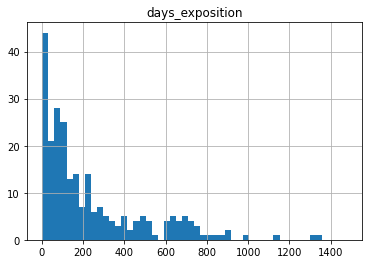

In [70]:
# строю гистограмму
piter_center['days_exposition'].hist(bins=50, range = (1,1477)) 
plt.title('days_exposition')

Большая часть квартир продается в период до 230 дней. Однако наблюдаются квартиры, которые за год не снимают с продажи и еще долго (3-4 года) находяться в объявлениях о продаже.

**Вывод**

С помощью описательной статистики и гистограмм изучены значения цены, площади, числа комнат, высоты потолков и количество дней размещения объявления.  

Прослеживаются параметры массового жилья. 

Отчетливо прослеживается стандартное время размещения объявления, однако присутствует немалое количество крайне высоких значений количества дней.

#### Зависимость цены от площади, числа комнат, этажа, удалённости от центра и даты размещения объявления.   Сравнение с общими выводами.


Посчитаю коэффициент корреляцию для цены, площади, числа комнат и удалённости от центра.

In [71]:
# рассчет коэффициента корреляции
piter_center[['last_price', 'total_area', 'rooms', 'city_centers_nearest_km']].corr() 

,last_price,total_area,rooms,city_centers_nearest_km
last_price,1.00,0.66,0.48,-0.04
total_area,0.66,1.00,0.73,0.00
rooms,0.48,0.73,1.00,-0.04
city_centers_nearest_km,-0.04,0.00,-0.04,1.00


* наблюдается средняя зависимость стоимости квартиры от ее площади
* наблюдается слабая зависимость стоимости квартиры от количества комнат
* наблюдается обратная очень слабая зависимость стоимости квартиры от ее удаленности от центра

Сгруппирую категорию этажа и посчитаю среднее значение для каждой категории, присвою результат новой переменной.

In [72]:
# группировка и расчет среднего значения
floor_price_piter_center = piter_center.groupby('floor_category')['last_price'].mean() 
floor_price_piter_center

floor_category
другой      8,150,222.97
первый      6,699,559.98
последний   8,354,746.67
Name: last_price, dtype: float64

Посторою график зависимости цены от этажа.

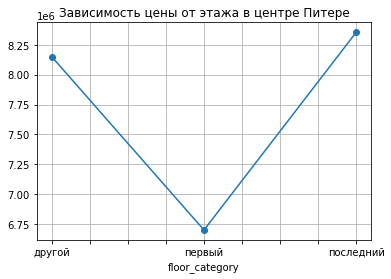

In [73]:
 # построение графика
floor_price_piter_center.plot(
    x='floor_category',  
    grid=True, 
    style='o-', 
    title='Зависимость цены от этажа в центре Питере'
);

На графике отчетливо видно, что стоимость квартиры зависит от этажа: намного ниже по стоимости квартиры на первом этаже, на остальных этажах дороже. На последнем этаже дороже чуть дороже остальных.

Сравню с графиком по общим данным.

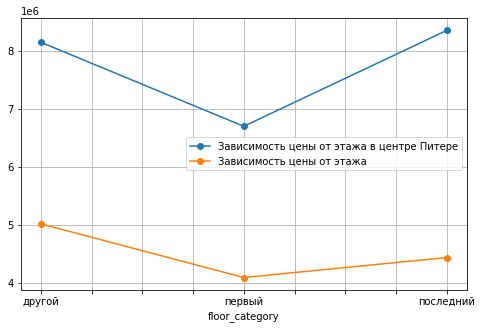

In [74]:
floor_price_piter_center.plot(
    x='floor_category', 
    grid=True, 
    style='o-',
    label='Зависимость цены от этажа в центре Питере', 
    figsize=(8,5)
)
floor_price.plot(
    x='floor_category',  
    grid=True, 
    style='o-', 
    label='Зависимость цены от этажа')
plt.legend();

В центре Питера заметнее разница в стоимости между первым и остальными этажами. Более того, стоимость квартир на последнем этаже в центре немного выше остальных этажей. Тогда как в общих данных стоимость квартир на последнем этаже ниже остальных, кроме первого. 

Посторою график зависимости цены от года размещения объявления о продаже.

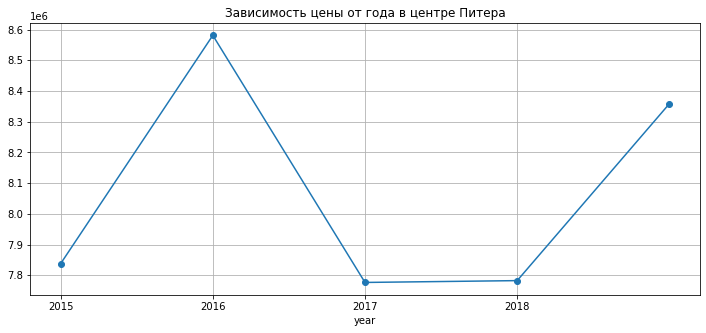

In [75]:
# группировка и расчет среднего значения
year_exposition_piter_center = piter_center.groupby('year')['last_price'].mean() 
# получение осей для настройки отображения значений
fig, ax = plt.subplots() 
# отображение целых значений
ax.set_xticks(range(2015, 2019)) 
# построение графика
year_exposition_piter_center.plot(
    x='year', 
    grid=True, 
    style='o-',
    title='Зависимость цены от года в центре Питера',
    figsize=(12,5), 
    ax=ax
); 

Нет данных за 2014 год. В 2016 году заметна высокая стоимость квартир по сравнению с 2015, 2017 и 2018 годами. К 2019 году наблюдается тенденция к повышению стоимости квартир.

Сравню с графиком по общим данным.

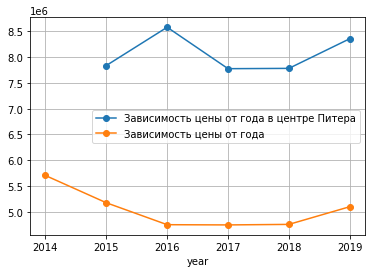

In [76]:
year_exposition_piter_center.plot(
    x='year', 
    grid=True,
    style='o-', 
    label='Зависимость цены от года в центре Питера')
year_exposition.plot(
    x='year', 
    grid=True, 
    style='o-',
    label='Зависимость цены от года')
plt.legend();

Прослеживается более заметная зависимость стоимости квартиры в центре от года размещения объявления по сравнению с общими данными. 

Посторою график зависимости цены от месяца размещения объявления о продаже.

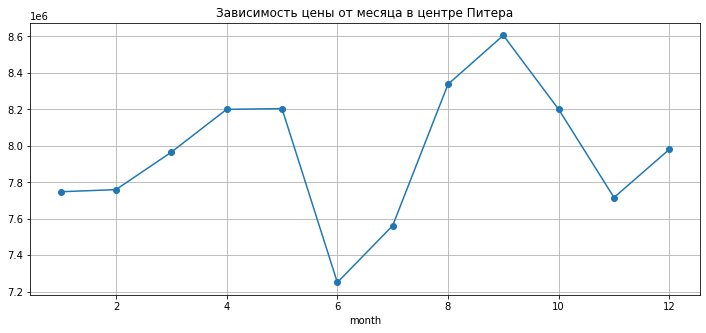

In [77]:
month_exposition_piter_center = piter_center.groupby('month')['last_price'].mean()
month_exposition_piter_center.plot(
    x='month', 
    grid=True,
    style='o-',
    title='Зависимость цены от месяца в центре Питера',
    figsize=(12,5)
);


Наблюдается зависимость цены от месяца размещения объявления. Весной цена немного растет, к началу лета заметно падает, к осени сильно поднимается, затем к зиме начинает снижаться.

Сравню с графиком по общим данным.

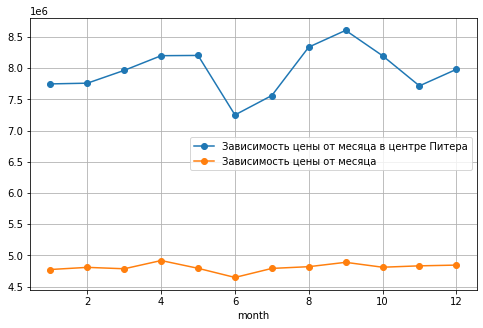

In [78]:
month_exposition_piter_center.plot(
    x='month', 
    grid=True, 
    style='o-', 
    label='Зависимость цены от месяца в центре Питера', 
    figsize=(8,5)
)
week_exposition.plot(
    x='month', 
    grid=True, 
    style='o-',
    label='Зависимость цены от месяца')
plt.legend();

Наблюдаются заметные скачки в стоимости квартир в зависимости от месяца размещения объявления в центре Санкт-Петербурга, тогда как в общих данных они  незначительны.   

Посторою график зависимости цены от дня недели размещения объявления о продаже.

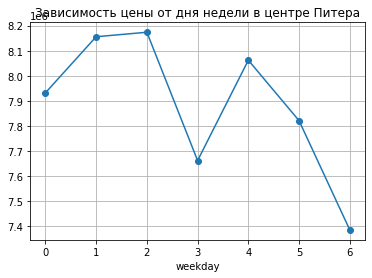

In [79]:
weekday_exposition_piter_center = piter_center.groupby('weekday')['last_price'].mean ()
weekday_exposition_piter_center.plot(
    x='weekday', 
    grid=True, 
    style='o-',
    title='Зависимость цены от дня недели в центре Питера'
);


К четвергу цена резко падает, в пятницу поднимается, к выходным резко снижается.

Сравню с графиком по общим данным.

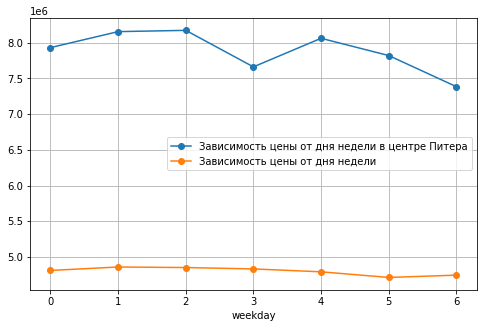

In [80]:
weekday_exposition_piter_center.plot(
    x='weekday', 
    grid=True, 
    style='o-', 
    label='Зависимость цены от дня недели в центре Питера', 
    figsize=(8,5)
)
weekday_exposition.plot(
    x='weekday',  
    grid=True, 
    style='o-', 
    label='Зависимость цены от дня недели')
plt.legend();

Наблюдается зависимость цены от дня недели размещения объявления в центре Санкт-Петербурга, тогда как в общих данных подобной тенденции не прослеживается.

**Вывод**

Выделен сегмент квартир в центре Санкт-Петербурга.  
Проанализирована эта территория и изучены следующие параметры: цена, площадь, количество комнат, высота потолков и количество времени для продажи квартиры. 

Выделены факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга.
Проведено сравнение с выводами по общим данным.

Наблюдается одинаковая зависимость стоимости квартир в общих данных и в центре Санкт-Петербурге от следующих значений:

* средняя зависимость от площади квартиры
* слабая зависимость от количества комнат
* заметная зависимость от этажа квартиры

В центре Санкт-Петербурга заметнее разница в стоимости между первым и остальными этажами. Стоимость квартир на последнем этаже в центре немного выше остальных этажей. В общих данных стоимость квартир на последнем этаже ниже остальных, кроме первого.

Прослеживается более заметная зависимость стоимости квартиры в центре от года размещения объявления по сравнению с общими данными.

Наблюдаются заметные скачки в стоимости квартир в зависимости от месяца размещения объявления в центре Санкт-Петербурга, тогда как в общих данных они  незначительны.   

Наблюдается зависимость цены от дня недели размещения объявления в центре Санкт-Петербурга, тогда как в общих данных подобной тенденции не прослеживается.


##  Общий вывод

Проведен исследовательский анализ данных. По результатам исследования обнаружены значения, так или иначе влияющие на формирование стоимости квартир в центре Санкт-Петербурга и близлежащих населенных пунктах.

В центре Санкт-Петербурга выявлены следующие зависимости цены от значений: 

1. Средняя зависимость от площади квартиры.
2. Слабая зависимость от количества комнат.
3. Заметная зависимость от этажа квартиры.
4. Заметная зависимость от дня недели, месяца и года размещения объявления о продаже квартиры.

В Санкт-Петербурге и близлежащих населенных пунктах выявлены следующие зависимости цены от значений: 

1. Средняя зависимость от площади квартиры.
2. Слабая зависимость от количества комнат.
3. Обратная слабая зависимость от удаленности квартиры от центра.
4. Небольшая зависимость от этажа квартиры.